In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Senior Year/Machine Learning/Data/HousePriceRegressionTrain.csv')

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df['GarageAreaPerCar'] = df['GarageArea'] / df['GarageCars']

df['1stFlrSF_TotalBsmtSF_diff'] = df['1stFlrSF'] - df['TotalBsmtSF']

df['TotalBath'] = df['FullBath'] + (0.5 * df['HalfBath'])

df['OverallQual_squared'] = df['OverallQual'] ** 2

<ipython-input-21-dde760fdf5d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


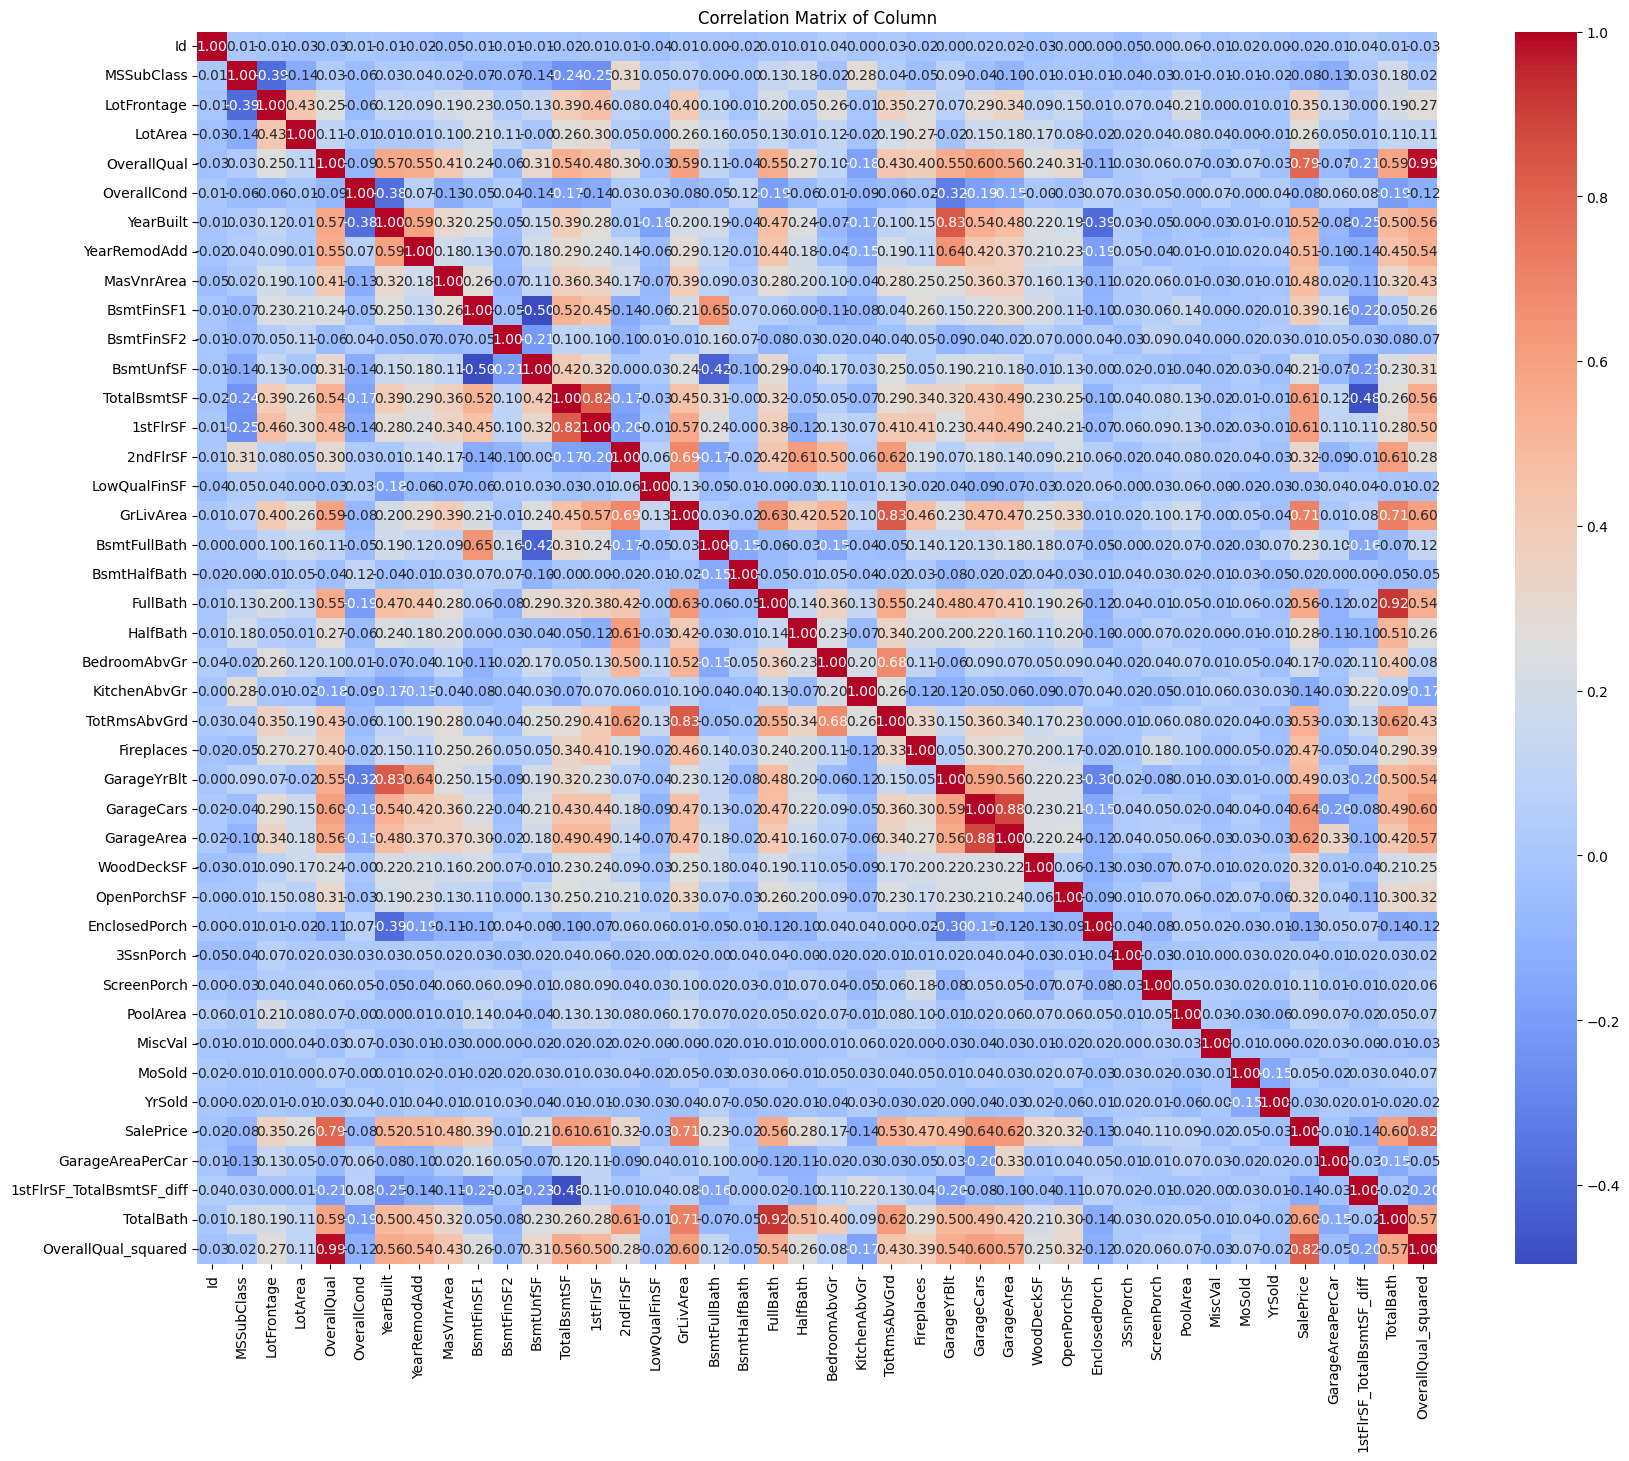

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Column')
plt.show()

In [ ]:

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_data


,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [ ]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', min_frequency=0.01))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape


((1168, 241), (292, 241))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Defining the parameter space for RandomizedSearchCV


{'regressor__max_depth': 12,
 'regressor__min_samples_leaf': 3,
 'regressor__min_samples_split': 8,
 'regressor__n_estimators': 343}

In [ ]:
param_dist = {
    'regressor__n_estimators': randint(100, 500),
    'regressor__max_depth': randint(3, 20),
    'regressor__min_samples_split': randint(2, 11),
    'regressor__min_samples_leaf': randint(1, 11)
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fitting the model
random_search.fit(X_train, y_train)

# Best parameters
best_params_rf = random_search.best_params_
best_params_rf

In [ ]:
rf_pipeline.set_params(regressor__max_depth=12,
                    regressor__min_samples_leaf=3,
                    regressor__min_samples_split=8,
                    regressor__n_estimators=343)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrS...
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=12, min_samples_leaf=3,
                                       min_samples_split=8, n_estimators=343,
                                       random_state=42))])

In [ ]:
rf_pipeline.fit(X_train_processed, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrS...
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=12, min_samples_leaf=3,
                                       min_samples_split=8, n_estimators=343,
                                       random_state=42))])

In [ ]:
len(X_train_preprocessed)

1168

In [ ]:
# Function to get feature names from ColumnTransformer
def get_feature_names(column_transformer):
    feature_names = []

    # Loop over all transformers in the ColumnTransformer
    for transformer_in_pipeline in column_transformer.transformers_:
        transformer_name, transformer, orig_feature_names = transformer_in_pipeline
        if transformer_name != 'remainder':
            if hasattr(transformer, 'get_feature_names_out'):
                # Newer versions of sklearn
                transformer_feature_names = transformer.get_feature_names_out(orig_feature_names)
            else:
                # Old behavior in sklearn for OneHotEncoder
                transformer_feature_names = transformer.get_feature_names(orig_feature_names)
            feature_names.extend(transformer_feature_names)
        else:
            # If 'remainder', use the original column names
            feature_names.extend(orig_feature_names)

    return feature_names

# Extract feature names after preprocessing
processed_feature_names = get_feature_names(preprocessor)

# Compute mutual information scores and select features
def select_features(X, y, threshold=0.01):
    scores = mutual_info_regression(X, y, n_neighbors=5)
    scores = pd.Series(scores, index=processed_feature_names).sort_values(ascending=False)
    selected = scores[scores > threshold].keys().tolist()
    return selected

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Impute missing values in numerical features
imputer = SimpleImputer(strategy='median')
X_train_numerical_imputed = imputer.fit_transform(X_train[numerical_features])
X_test_numerical_imputed = imputer.transform(X_test[numerical_features])

# One-hot encode categorical variables in X_train and X_test
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convert imputed and encoded features into DataFrame
X_train_numerical_df = pd.DataFrame(X_train_numerical_imputed, columns=numerical_features, index=X_train.index)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)

# Combine the imputed numerical features with the encoded categorical features
X_train_combined = pd.concat([X_train_numerical_df, X_train_encoded_df], axis=1)
X_test_combined = pd.concat([X_test_numerical_df, X_train_encoded_df], axis=1)  # Corrected to use X_train_encoded_df

# Perform feature selection
selected_columns = select_features(X_train_combined, y_train)

# Filter the original datasets to include only selected features
X_train_selected = X_train_combined[selected_columns].clip(lower=0)
X_test_selected = X_test_combined[selected_columns].clip(lower=0)

# Apply log transformation
X_train_selected = np.log1p(X_train_selected)
X_test_selected = np.log1p(X_test_selected)

X_train_selected.head()

ValueError: ignored

In [ ]:
cols

[40,
 4,
 16,
 6,
 12,
 26,
 27,
 39,
 1,
 13,
 25,
 19,
 7,
 143,
 14,
 213,
 142,
 195,
 157,
 151,
 29,
 156,
 24,
 3,
 23,
 194,
 11,
 2,
 9,
 181,
 5,
 209,
 154,
 37,
 211,
 150,
 192,
 28,
 168,
 133,
 38,
 122,
 187,
 184,
 44,
 8,
 212,
 206,
 139,
 20,
 186,
 205,
 81,
 52,
 223,
 233,
 141,
 78,
 190,
 239,
 21,
 203,
 106,
 80,
 72,
 165,
 140,
 50,
 43,
 75,
 221,
 86,
 103,
 111,
 74,
 110,
 118,
 138,
 134,
 234,
 17,
 201,
 193,
 98,
 123,
 30,
 188,
 145,
 166,
 79,
 162,
 149,
 119,
 41,
 183,
 82,
 208,
 163,
 130,
 22,
 84,
 70,
 228,
 128,
 117,
 69,
 76,
 152,
 48,
 182,
 107,
 63,
 61,
 158,
 129,
 171,
 178,
 189,
 0,
 77,
 180,
 49,
 144,
 87,
 55,
 32,
 108,
 104,
 89,
 101,
 170,
 164,
 105,
 100,
 216,
 54,
 218,
 238,
 126,
 88,
 214,
 71,
 159,
 167]

In [ ]:
# Filter original X_train and X_test datasets to include only selected features
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

X_train_selected.head()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,
        14,  16,  17,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  32,  36,  37,  38,  39,  40,  41,  43,  44,  48,  49,
        50,  52,  54,  55,  57,  61,  68,  69,  70,  72,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  84,  86,  87,  90,  91,  98, 101,
       103, 106, 107, 108, 110, 111, 117, 118, 119, 122, 123, 128, 129,
       130, 133, 134, 138, 139, 140, 141, 142, 143, 144, 145, 147, 149,
       150, 151, 152, 154, 156, 157, 162, 163, 165, 166, 168, 170, 171,
       178, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 192, 193,
       194, 195, 201, 203, 204, 205, 206, 208, 209, 211, 212, 213, 214,
       218, 219, 221, 223, 228, 233, 234, 239])

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predictions on training and test set
y_train_pred = rf_pipeline.predict(X_train)
y_test_pred = rf_pipeline.predict(X_test)

# Calculating RMSE for training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

rmse_train, rmse_test

(17047.12149892827, 30252.1804615565)

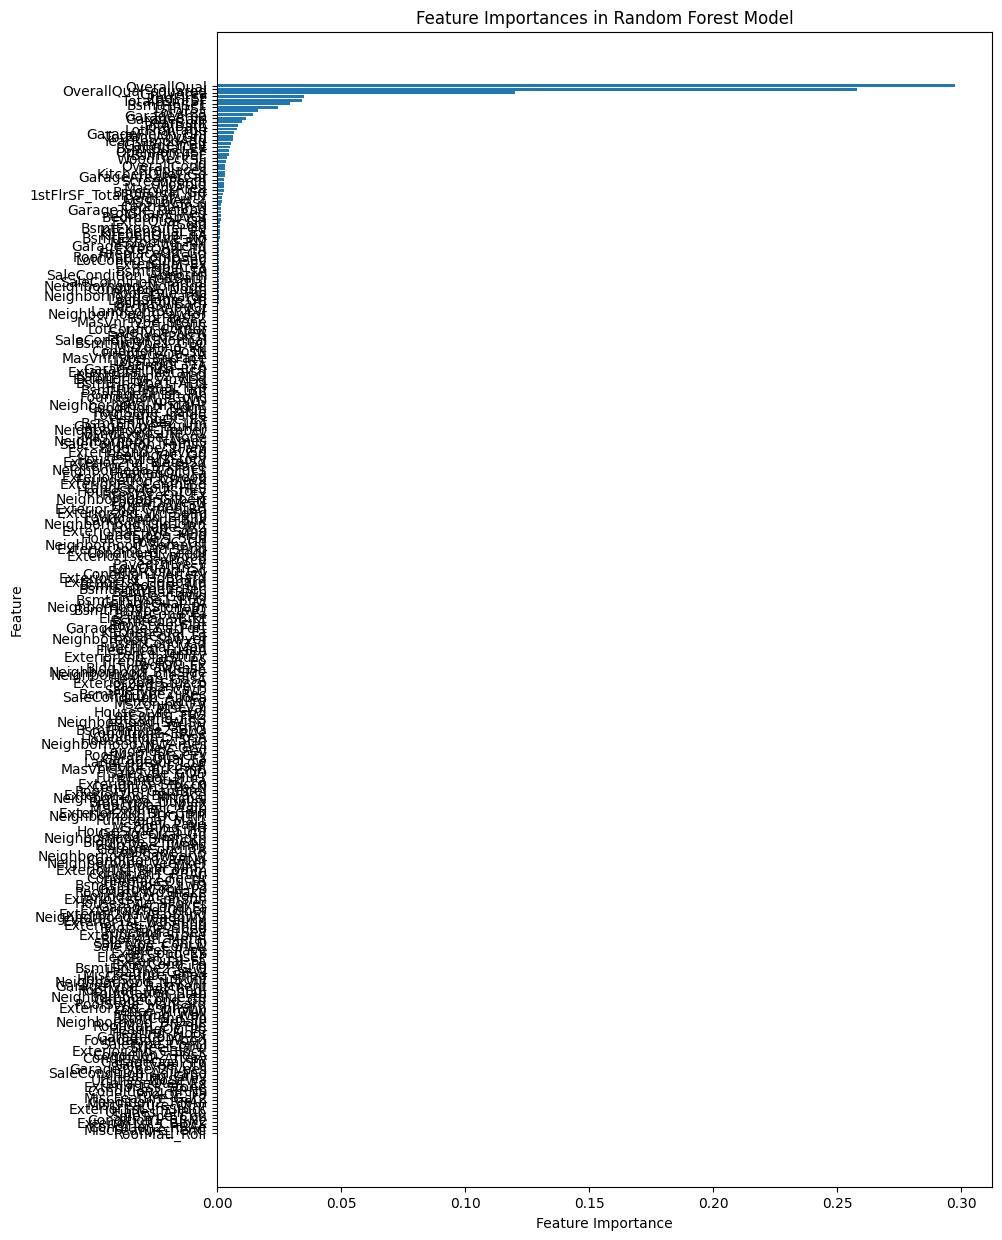

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Assuming preprocessor and other variables are already defined
rf_default = RandomForestRegressor(random_state=42)
rf_default_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', rf_default)
])

# Fitting the model
rf_default_pipeline.fit(X_train, y_train)

# Getting feature importances from the 'regressor' step of the pipeline
feature_importances = rf_default_pipeline.named_steps['regressor'].feature_importances_

# Getting encoded feature names
encoded_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(input_features=categorical_features)
all_feature_names = np.concatenate((numerical_features, encoded_feature_names))

# Sorting features by importance
sorted_idx = feature_importances.argsort()


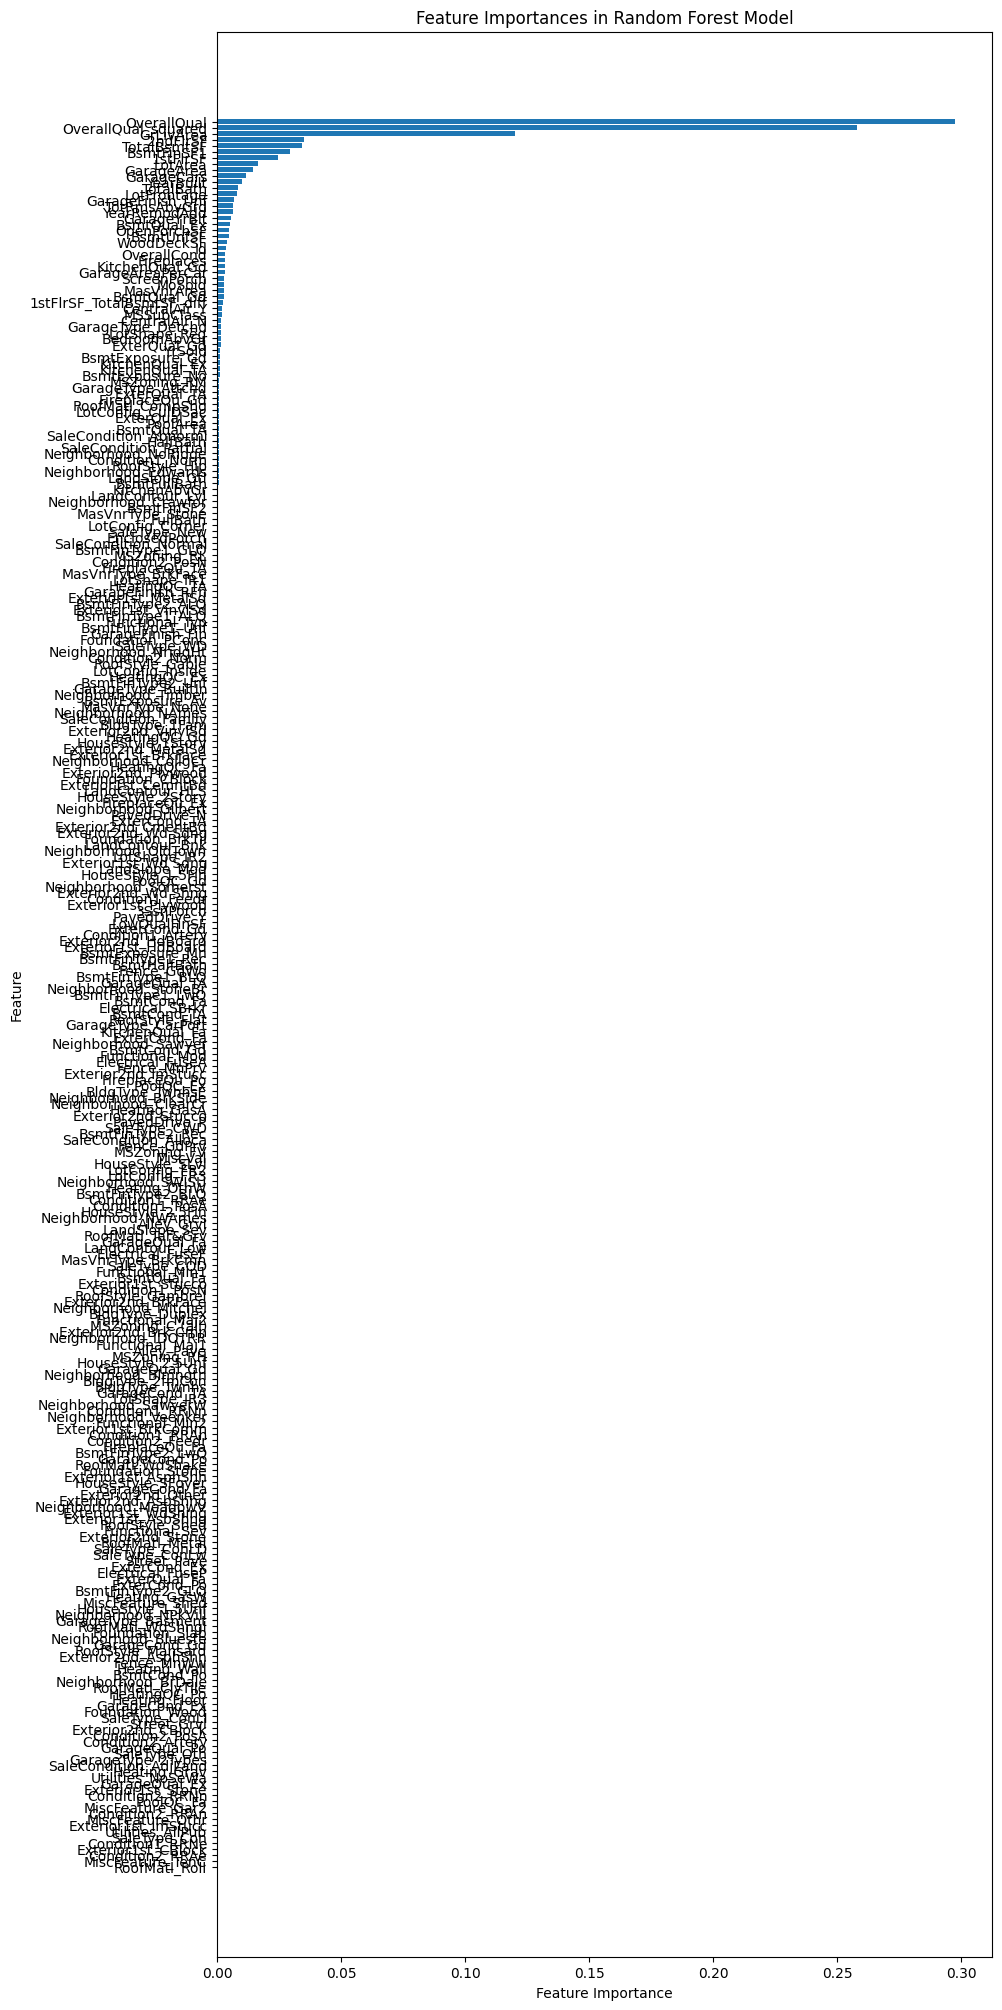

In [ ]:
plt.figure(figsize=(10, 25))
plt.barh(all_feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_train_pred = rf_default_pipeline.predict(X_train)
y_test_pred = rf_default_pipeline.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

rmse_train, rmse_test

(11188.717107861905, 28869.938708621044)

In [ ]:

X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

X_train_fe['GarageAreaPerCar'] = X_train_fe['GarageArea'] / X_train_fe['GarageCars']
X_test_fe['GarageAreaPerCar'] = X_test_fe['GarageArea'] / X_test_fe['GarageCars']

X_train_fe['1stFlrSF_TotalBsmtSF_diff'] = X_train_fe['1stFlrSF'] - X_train_fe['TotalBsmtSF']
X_test_fe['1stFlrSF_TotalBsmtSF_diff'] = X_test_fe['1stFlrSF'] - X_test_fe['TotalBsmtSF']

X_train_fe['TotalBath'] = X_train_fe['FullBath'] + (0.5 * X_train_fe['HalfBath'])
X_test_fe['TotalBath'] = X_test_fe['FullBath'] + (0.5 * X_test_fe['HalfBath'])

X_train_fe['OverallQual_squared'] = X_train_fe['OverallQual'] ** 2
X_test_fe['OverallQual_squared'] = X_test_fe['OverallQual'] ** 2

rf_pipeline.fit(X_train_fe, y_train)

feature_importances_fe = rf_pipeline.named_steps['regressor'].feature_importances_

new_features = ['GarageAreaPerCar', '1stFlrSF_TotalBsmtSF_diff', 'TotalBath', 'OverallQual_squared']
all_feature_names_fe = np.concatenate((all_feature_names, new_features))

sorted_idx_fe = feature_importances_fe.argsort()

plt.figure(figsize=(10, 15))
plt.barh(all_feature_names_fe[sorted_idx_fe], feature_importances_fe[sorted_idx_fe])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model (After Feature Engineering)')
plt.show()


In [ ]:
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.001, random_state=42))
])

lasso_pipeline.fit(X_train, y_train)

y_train_pred_lasso = lasso_pipeline.predict(X_train)
y_test_pred_lasso = lasso_pipeline.predict(X_test)

rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

rmse_train_lasso, rmse_test_lasso


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206019227011.7402, tolerance: 696659484.3571944
  model = cd_fast.sparse_enet_coordinate_descent(


(18876.084421258096, 28011.950169825646)

In [ ]:
import xgboost as xgb

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

xgb_pipeline.fit(X_train, y_train)

y_train_pred_xgb = xgb_pipeline.predict(X_train)
y_test_pred_xgb = xgb_pipeline.predict(X_test)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

rmse_train_xgb, rmse_test_xgb


(1063.134920977783, 26134.654150184928)

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train_processed, y_train)

feature_importances = xgb_regressor.feature_importances_

encoded_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(input_features=categorical_features)
all_feature_names_fe = np.concatenate((numerical_features, encoded_feature_names))

threshold = 0.01

important_features = all_feature_names_fe[feature_importances >= threshold]

X_train_important = X_train_processed[:, feature_importances >= threshold]
X_test_important = X_test_processed[:, feature_importances >= threshold]

xgb_important = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_important.fit(X_train_important, y_train)

y_train_pred = xgb_important.predict(X_train_important)
y_test_pred = xgb_important.predict(X_test_important)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Training RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Important features:", important_features)

Training RMSE: 7116.404618864806
Test RMSE: 30212.770780037525
Important features: ['OverallQual' 'TotalBsmtSF' 'GrLivArea' 'GarageCars' 'LandContour_Bnk'
 'Neighborhood_ClearCr' 'ExterQual_Ex' 'BsmtQual_Ex' 'CentralAir_N'
 'KitchenQual_Ex' 'KitchenQual_TA' 'GarageType_Detchd' 'GarageFinish_Unf']


In [ ]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha=0.001, random_state=42)
lasso_regressor.fit(X_train_processed, y_train)

lasso_coef = lasso_regressor.coef_
selected_features = all_feature_names_fe[lasso_coef != 0]

X_train_selected = X_train_processed[:, lasso_coef != 0]
X_test_selected = X_test_processed[:, lasso_coef != 0]

xgb_selected = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_selected.fit(X_train_selected, y_train)

y_train_pred_xgb_selected = xgb_selected.predict(X_train_selected)
y_test_pred_xgb_selected = xgb_selected.predict(X_test_selected)
rmse_train_xgb_selected = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_selected))
rmse_test_xgb_selected = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_selected))

rmse_train_xgb_selected, rmse_test_xgb_selected, selected_features



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206019227011.7402, tolerance: 696659484.3571944
  model = cd_fast.sparse_enet_coordinate_descent(


(1012.4652703586731,
 26334.526608044016,
 array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'GarageAreaPerCar',
        '1stFlrSF_TotalBsmtSF_diff', 'TotalBath', 'OverallQual_squared',
        'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
        'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl',
        'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3',
        'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS',
        'LandCo

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Define resampling strategies, with Combined_SMOTE_RUS as a list of transformations
strategies = {
    'SMOTE': SMOTE(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'Combined_SMOTE_RUS': [
        ('SMOTE', SMOTE(random_state=42)),
        ('RandomUnderSampler', RandomUnderSampler(random_state=42))
    ]
}

# Function to evaluate each resampling strategy
def evaluate_strategy(strategy, pipeline):
    # If the strategy is a list (like Combined_SMOTE_RUS), we directly use it, otherwise, we wrap it in a list
    resampling_steps = strategy if isinstance(strategy, list) else [('resampling', strategy)]

    model_pipeline = ImbPipeline([
        ('preprocessor', preprocessor)
    ] + resampling_steps + [
        ('model', pipeline)
    ])

    try:
        cv_scores = cross_val_score(model_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5, error_score='raise')
        return np.sqrt(-cv_scores.mean())  # RMSE
    except ValueError as e:
        print(f"Error occurred for strategy {strategy}: {e}")
        return None

# Evaluating each resampling strategy
scores = {strategy_name: evaluate_strategy(strategy, xgb_pipeline) for strategy_name, strategy in strategies.items()}
scores



Error occurred for strategy SMOTE(random_state=42): Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6
Error occurred for strategy RandomUnderSampler(random_state=42): Specifying the columns using strings is only supported for pandas DataFrames
Error occurred for strategy [('SMOTE', SMOTE(random_state=42)), ('RandomUnderSampler', RandomUnderSampler(random_state=42))]: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6


{'SMOTE': None, 'RandomUnderSampler': None, 'Combined_SMOTE_RUS': None}

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.5 MB/s eta 0:00:00


[00:26:30] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[00:26:31] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


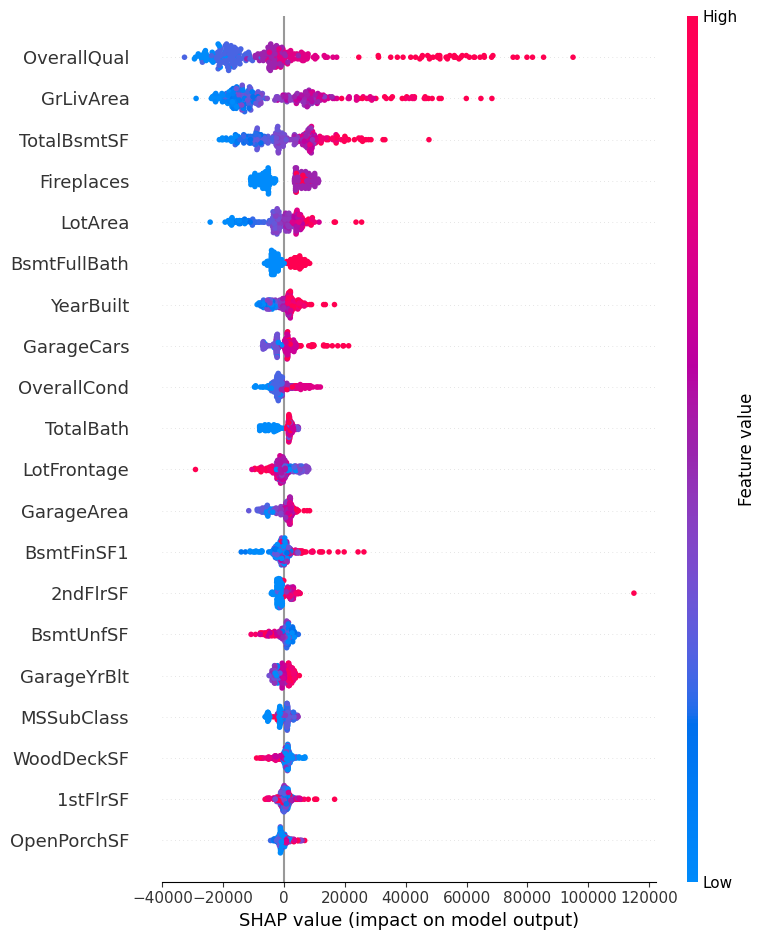

In [ ]:
import shap

# Convert the processed training and test data to dense format
X_train_dense = X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed
X_test_dense = X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed

# Extract the trained XGBoost model from the pipeline
trained_xgb_model = xgb_pipeline.named_steps['regressor']

# Compute SHAP values
explainer = shap.Explainer(trained_xgb_model, X_train_dense)
shap_values = explainer(X_test_dense)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_test_dense, feature_names=all_feature_names_fe)


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Senior Year/Machine Learning/Data/HousePriceRegressionTest.csv')

In [ ]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageAreaPerCar,1stFlrSF_TotalBsmtSF_diff,TotalBath,OverallQual_squared
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2010,WD,Normal,730.000000,14.0,1.0,25
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,Gar2,12500,6,2010,WD,Normal,312.000000,0.0,1.5,36
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,3,2010,WD,Normal,241.000000,0.0,2.5,25
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,6,2010,WD,Normal,235.000000,0.0,2.5,36
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,0,1,2010,WD,Normal,253.000000,0.0,2.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2006,WD,Normal,NaN,0.0,1.5,16
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,4,2006,WD,Abnorml,286.000000,0.0,1.5,16
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,9,2006,WD,Abnorml,288.000000,0.0,1.0,25
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,Shed,700,7,2006,WD,Normal,NaN,58.0,1.0,25


In [ ]:
df_test['GarageAreaPerCar'] = df_test['GarageArea'] / df_test['GarageCars']

df_test['1stFlrSF_TotalBsmtSF_diff'] = df_test['1stFlrSF'] - df_test['TotalBsmtSF']

df_test['TotalBath'] = df_test['FullBath'] + (0.5 * df_test['HalfBath'])

df_test['OverallQual_squared'] = df_test['OverallQual'] ** 2



predicted_sale_prices = xgb_pipeline.predict(df_test)

submission = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': predicted_sale_prices
})

submission.to_csv('/content/drive/MyDrive/Senior Year/Machine Learning/Data/HousePriceRegressionSubmission.csv', index=False)
